In [1]:
# install Pint if necessary

try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 4.3 MB/s eta 0:00:00


In [2]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [3]:
# import functions from modsim

from modsim import *

In [4]:
def task_do_pending():
    task.done -= 1
    task.pending += 1

In [5]:
def task_do_pending(state):
    state.done -= 1
    state.pending += 1

In [6]:
task = State(done=10, pending=2)
task_do_pending(task)

In [7]:
task1 = State(done=10, pending=2)
task2 = State(done=2, pending=10)

And update them independently:

In [8]:
task_do_pending(task1)
task_do_pending(task2)

In [9]:
def task_do_done(state):
    """Move one task from pending to done.

    state: task State object
    """
    # We decrease one state variable and increase the
    # other so the total number of tasks is unchanged.
    state.pending -= 1
    state.done += 1

In [10]:
def task_do_done(state):
    if state.pending == 0:
        return
    state.pending -= 1
    state.done += 1

In [11]:
task = State(done=12, pending=0)
task_do_done(task)

In [12]:
show(task)

,state
done,12
pending,0


In [13]:
def task_do_done(state):
    if state.pending == 0:
        state.pending_empty += 1
        return
    state.pending -= 1
    state.done += 1

If a customer arrives at the pending station and finds no task
available, `task_do_done` updates `pending_empty`, which counts the
number of unhappy customers.

This function only works if we initialize `pending_empty` when we
create the `State` object, like this:

In [14]:
task = State(done=12, pending=0,
                  pending_empty=0)

We can test it by calling `task_do_done`:

In [15]:
task_do_done(task)

After this update, there should be 12 tasks at done, no tasks at pending, and one unhappy customer.

In [16]:
show(task)

,state
done,12
pending,0
pending_empty,1


Looks good!

In [18]:
def run_simulation(state, p1, p2, num_steps):
    """Simulate the given number of time steps.

    state: State object
    p1: probability of an done->pending customer arrival
    p2: probability of a pending->done customer arrival
    num_steps: number of time steps
    """
    results = TimeSeries()
    results[0] = state.done

    for i in range(num_steps):
        step(state, p1, p2)
        results[i+1] = state.done

    results.plot(label='done')
    decorate(title='done-pending task',
             xlabel='Time step (min)',
             ylabel='Number of tasks')

In [19]:
def step(state, p1, p2):
    """Simulate one time step.

    state: task State object
    p1: probability of an done->pending ride
    p2: probability of a pending->done ride
    """
    if flip(p1):
        task_do_pending(state)

    if flip(p2):
        task_do_done(state)

In [20]:
def task_do_done(state):
    """Move one task from pending to done.

    state: task State object
    """
    if state.pending == 0:
        state.pending_empty += 1
        return
    state.pending -= 1
    state.done += 1

In [21]:
def task_do_pending(state):
    """Move one task from done to pending.

    state: task State object
    """
    state.done -= 1
    state.pending += 1

Here Chapter 4 starts as chapter 4 needed chapter 3

In [22]:
def run_simulation(p1, p2, num_steps):
    state = State(done=10, pending=2,
                  done_empty=2, pending_empty=2)

    for i in range(num_steps):
        step(state, p1, p2)

    return state

In [23]:
final_state = run_simulation(1, 1, 8)

In [24]:
print(final_state.done_empty,
      final_state.pending_empty)

2 2


In [25]:
from numpy import linspace

p1_array = linspace(0, 1, 5)
p1_array

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [26]:
for p1 in p1_array:
    print(p1)

0.0
0.25
0.5
0.75
1.0


In [27]:
p1_array = linspace(0, 0.6, 6)
p2 = 0.2
num_steps = 60

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    print(p1, final_state.done_empty)

0.0 2
0.12 2
0.24 2
0.36 2
0.48 2
0.6 2


In [28]:
sweep = SweepSeries()


In [29]:
p1_array = linspace(0, 0.6, 31)

for p1 in p1_array:
    final_state = run_simulation(p1, p2, num_steps)
    sweep[p1] = final_state.done_empty

In [31]:
show(sweep)

,Metric
Parameter,
0.00,2
0.02,2
0.04,2
0.06,2
0.08,2
0.10,2
0.12,2
0.14,2
0.16,2


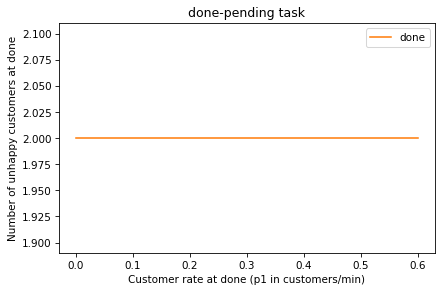

In [30]:
sweep.plot(label='done', color='C1')

decorate(title='done-pending task',
         xlabel='Customer rate at done (p1 in customers/min)',
         ylabel='Number of unhappy customers at done')